In [1]:
 # Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_proj/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_DA_PH = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Philippines')].copy()

In [4]:
df_DA_PH['job_posted_month_no'] = df_DA_PH['job_posted_date'].dt.month

In [5]:
df_DA_PH_explode = df_DA_PH.explode('job_skills')

In [14]:
df_DA_PH_pivot = df_DA_PH_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_PH_pivot.loc['Total'] = df_DA_PH_pivot.sum()

df_DA_PH_pivot = df_DA_PH_pivot[df_DA_PH_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_PH_pivot = df_DA_PH_pivot.drop('Total')

df_DA_PH_pivot

job_skills,excel,sql,python,tableau,power bi,sas,r,powerpoint,word,sheets,...,graphql,node.js,centos,chef,unity,kubernetes,trello,theano,elasticsearch,neo4j
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,323,234,144,121,113,62,72,78,75,37,...,0,0,0,1,0,0,0,0,1,0
2,172,141,100,71,61,32,41,44,38,15,...,0,0,0,0,0,0,0,0,0,0
3,143,141,65,74,60,46,34,34,35,23,...,0,0,1,0,0,0,0,0,0,0
4,179,105,59,71,59,32,31,36,33,27,...,0,0,0,0,0,0,0,0,0,0
5,135,132,82,64,65,26,38,29,25,21,...,0,0,0,0,0,0,0,0,0,0
6,186,138,67,74,81,42,26,31,33,32,...,0,0,0,0,1,0,0,1,0,0
7,192,189,98,102,103,64,63,36,41,14,...,0,0,0,0,0,0,1,0,0,0
8,209,186,84,100,101,60,50,53,42,22,...,1,1,0,0,0,0,0,0,0,0
9,186,133,70,78,82,44,34,40,35,17,...,0,0,0,0,0,0,0,0,0,0


In [17]:
DA_totals = df_DA_PH.groupby('job_posted_month_no').size()

In [20]:
df_DA_PH_percent = df_DA_PH_pivot.div(DA_totals/100, axis=0)

df_DA_PH_percent

job_skills,excel,sql,python,tableau,power bi,sas,r,powerpoint,word,sheets,...,graphql,node.js,centos,chef,unity,kubernetes,trello,theano,elasticsearch,neo4j
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,42.668428,30.911493,19.022457,15.984148,14.927345,8.190225,9.511229,10.303831,9.907530,4.887715,...,0.000000,0.000000,0.000000,0.1321,0.000000,0.000000,0.000000,0.000000,0.1321,0.000000
2,45.989305,37.700535,26.737968,18.983957,16.310160,8.556150,10.962567,11.764706,10.160428,4.010695,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
3,39.832869,39.275766,18.105850,20.612813,16.713092,12.813370,9.470752,9.470752,9.749304,6.406685,...,0.000000,0.000000,0.278552,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
4,53.753754,31.531532,17.717718,21.321321,17.717718,9.609610,9.309309,10.810811,9.909910,8.108108,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
5,43.408360,42.443730,26.366559,20.578778,20.900322,8.360129,12.218650,9.324759,8.038585,6.752412,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
6,47.938144,35.567010,17.268041,19.072165,20.876289,10.824742,6.701031,7.989691,8.505155,8.247423,...,0.000000,0.000000,0.000000,0.0000,0.257732,0.000000,0.000000,0.257732,0.0000,0.000000
7,46.943765,46.210269,23.960880,24.938875,25.183374,15.647922,15.403423,8.801956,10.024450,3.422983,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.244499,0.000000,0.0000,0.000000
8,47.716895,42.465753,19.178082,22.831050,23.059361,13.698630,11.415525,12.100457,9.589041,5.022831,...,0.228311,0.228311,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
9,50.134771,35.849057,18.867925,21.024259,22.102426,11.859838,9.164420,10.781671,9.433962,4.582210,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000


In [21]:
df_DA_PH_percent = df_DA_PH_percent.reset_index()
df_DA_PH_percent['job_posted_month'] = df_DA_PH_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_PH_percent = df_DA_PH_percent.set_index('job_posted_month')
df_DA_PH_percent = df_DA_PH_percent.drop(columns='job_posted_month_no')

df_DA_PH_percent

job_skills,excel,sql,python,tableau,power bi,sas,r,powerpoint,word,sheets,...,graphql,node.js,centos,chef,unity,kubernetes,trello,theano,elasticsearch,neo4j
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,42.668428,30.911493,19.022457,15.984148,14.927345,8.190225,9.511229,10.303831,9.907530,4.887715,...,0.000000,0.000000,0.000000,0.1321,0.000000,0.000000,0.000000,0.000000,0.1321,0.000000
Feb,45.989305,37.700535,26.737968,18.983957,16.310160,8.556150,10.962567,11.764706,10.160428,4.010695,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
Mar,39.832869,39.275766,18.105850,20.612813,16.713092,12.813370,9.470752,9.470752,9.749304,6.406685,...,0.000000,0.000000,0.278552,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
Apr,53.753754,31.531532,17.717718,21.321321,17.717718,9.609610,9.309309,10.810811,9.909910,8.108108,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
May,43.408360,42.443730,26.366559,20.578778,20.900322,8.360129,12.218650,9.324759,8.038585,6.752412,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
Jun,47.938144,35.567010,17.268041,19.072165,20.876289,10.824742,6.701031,7.989691,8.505155,8.247423,...,0.000000,0.000000,0.000000,0.0000,0.257732,0.000000,0.000000,0.257732,0.0000,0.000000
Jul,46.943765,46.210269,23.960880,24.938875,25.183374,15.647922,15.403423,8.801956,10.024450,3.422983,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.244499,0.000000,0.0000,0.000000
Aug,47.716895,42.465753,19.178082,22.831050,23.059361,13.698630,11.415525,12.100457,9.589041,5.022831,...,0.228311,0.228311,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
Sep,50.134771,35.849057,18.867925,21.024259,22.102426,11.859838,9.164420,10.781671,9.433962,4.582210,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000


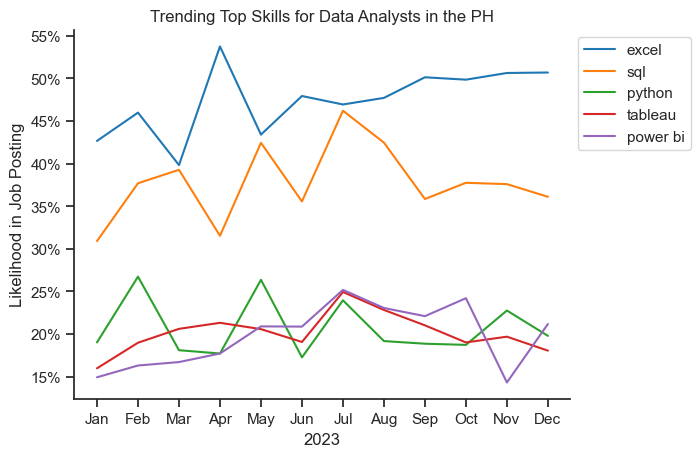

In [33]:
df_plot = df_DA_PH_percent.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in the PH')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.show()